In [1]:
import os
import xml.etree.ElementTree as ET
import numpy as np
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from PIL import Image
import glob
import cv2
import xml.etree.ElementTree as ET
import numpy as np

In [2]:
image_list = []
imgdict = {}
resized_images = []
from tqdm.notebook import tqdm

for filename in glob.glob('images/*.tif'):
    # print(filename)
    # img = Image.open(filename)
    img = cv2.imread(filename)
    # print(img.shape)
    # img = cv2.resize(img, (400,400))
    image_list.append(img)
    name = (filename.split('/')[1]).split('.')[0]
    imgdict[name] = img

labels = {}
ll2 = []
ll = []
for filename in glob.glob('labels/*.xml'):
    tree = ET.parse(filename) 
    root = tree.getroot()
    boxes = []
    for obj in root.findall('object'):
        name = obj.find('name').text
    if name == '1' or name == '2':
        bbox = [float(obj.find('bndbox/xmin').text), 
                float(obj.find('bndbox/ymin').text),
                float(obj.find('bndbox/xmax').text), 
                float(obj.find('bndbox/ymax').text)]
        ll.append(bbox)
        boxes.append(bbox)
    tag_name = (filename.split('/')[1]).split('.')[0]
    labels[tag_name] = boxes
    ll2.append(boxes)

# print(labels["000000033107.xml"])

# for image in image_list:
#     image = DoG(image)
#     resized_images.append(image)


def display_image_with_box(image, bbox):
    image_with_box = image.copy()
    # for i in bbox:
    #     cv2.rectangle(image_with_box, (int(i[0]), int(i[1])), (int(i[2]), int(i[3])), (0, 255, 0), thickness=2)
    cv2.rectangle(image_with_box, (int(bbox[0]), int(bbox[1])), (int(bbox[2]), int(bbox[3])), (0, 255, 0), thickness=2)
    cv2.imshow("Image", image_with_box)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    


In [3]:
imgdict['000000027752'].shape

(256, 256, 3)

In [4]:
labels

{'000000016931': [[111.51, 51.19, 126.95, 63.15]],
 '000000030048': [[0.0, 2.44, 3.64, 9.49]],
 '000000009811': [],
 '000000021145': [[79.08, 0.0, 126.49, 145.8]],
 '000000032887': [[194.36, 112.97, 217.47, 145.65]],
 '000000027252': [[63.38, 0.0, 75.87, 7.52]],
 '000000028161': [[173.08, 17.85, 193.32, 38.45]],
 '000000020529': [],
 '000000027246': [[242.34, 234.69, 256.0, 256.0]],
 '000000005959': [],
 '000000025451': [],
 '000000025337': [],
 '000000022458': [[138.35, 0.0, 150.19, 4.47]],
 '000000024029': [[0.0, 224.56, 10.74, 256.0]],
 '000000027520': [[0.0, 36.33, 4.16, 45.71]],
 '000000016925': [[246.39, 82.55, 256.0, 103.8]],
 '000000021151': [[64.73, 90.49, 70.97, 101.76]],
 '000000027508': [[125.94, 116.88, 174.36, 155.09]],
 '000000007800': [],
 '000000021179': [],
 '000000026616': [[209.88, 108.99, 226.02, 129.42]],
 '000000018920': [[113.78, 155.23, 142.2, 173.46]],
 '000000011904': [[71.77, 60.22, 94.85, 78.64]],
 '000000025479': [[0.0, 0.0, 85.91, 49.1]],
 '000000005965':

In [5]:

filtered_labels = {k: v for k, v in labels.items() if v}

In [6]:
# lb = []
# for i in filtered_labels.keys():
#   lb.append(int(i))

# c = 0
# for i in imgdict.keys():
#   for j in lb:
#     if int(i) == j:
#       c+=1  
# print(c)
filtered_image = {k: v for k, v in imgdict.items() if k in filtered_labels.keys()}
filtered_labels1 = {k: v[0] for k, v in filtered_labels.items()}
len(filtered_image) == len(filtered_labels)


True

In [8]:
# labellist = []
# imglist = []
# for k,v in filtered_labels1.items():
#     labellist.append(filtered_labels1[k])
# for k,v in filtered_image.items():
#     imglist.append(filtered_image [k])
# tmp1 = np.array(imglist)
# tmp2 = np.array(labellist)

In [9]:
labellist2 = []
imglist2 = []
for k,v in filtered_labels1.items():
    labellist2.append(filtered_labels1[k])
    imglist2.append(filtered_image[k])

In [11]:
newly_processed = []
for filename in glob.glob('newly_processed/*.png'):
    # print(filename)
    # img = Image.open(filename)
    img = cv2.imread(filename)
    # print(img.shape)
    # img = cv2.resize(img, (400,400))
    newly_processed.append(img)
    name = (filename.split('/')[1]).split('.')[0]
#     newly_processed[name] = img

In [12]:
len(newly_processed)

3892

In [14]:
len(labellist2)

3892

In [34]:
X_train, X_val, y_train, y_val = train_test_split(np.array(imglist2), np.array(labellist2), test_size=0.2, random_state=42)

# Normalize the data
X_train = X_train / 255.0
X_val = X_val / 255.0

# # Normalize the data
# X_train = X_train/511.0
# X_val = X_val/511.0

# Define the CNN model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(4, activation='linear') # Linear activation for regression
])

# Compile the model

model.compile(optimizer=tf.keras.optimizers.legacy.Adam(1e-3), loss='mse', metrics=['accuracy'])

# Train the model
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Make predictions on the validation set
y_pred = model.predict(X_val)

Epoch 1/20


2023-04-05 22:56:30.780354: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


98/98 [==============================] - ETA: 0s - loss: 8284.4648 - accuracy: 0.5008

2023-04-05 22:56:44.056395: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


98/98 [==============================] - 15s 149ms/step - loss: 8284.4648 - accuracy: 0.5008 - val_loss: 7260.0547 - val_accuracy: 0.4904
Epoch 2/20
98/98 [==============================] - 13s 129ms/step - loss: 7273.0952 - accuracy: 0.5114 - val_loss: 6963.8291 - val_accuracy: 0.5096
Epoch 3/20
98/98 [==============================] - 12s 126ms/step - loss: 7180.3892 - accuracy: 0.5355 - val_loss: 6783.6660 - val_accuracy: 0.5623
Epoch 4/20
98/98 [==============================] - 12s 126ms/step - loss: 7069.4507 - accuracy: 0.5410 - val_loss: 6776.1182 - val_accuracy: 0.5353
Epoch 5/20
98/98 [==============================] - 12s 121ms/step - loss: 6791.3525 - accuracy: 0.5686 - val_loss: 6416.0415 - val_accuracy: 0.5789
Epoch 6/20
98/98 [==============================] - 12s 123ms/step - loss: 6586.9253 - accuracy: 0.5782 - val_loss: 6506.7026 - val_accuracy: 0.5777
Epoch 7/20
 4/25 [===>..........................] - ETA: 0s

2023-04-05 22:57:58.684351: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 1s 51ms/step


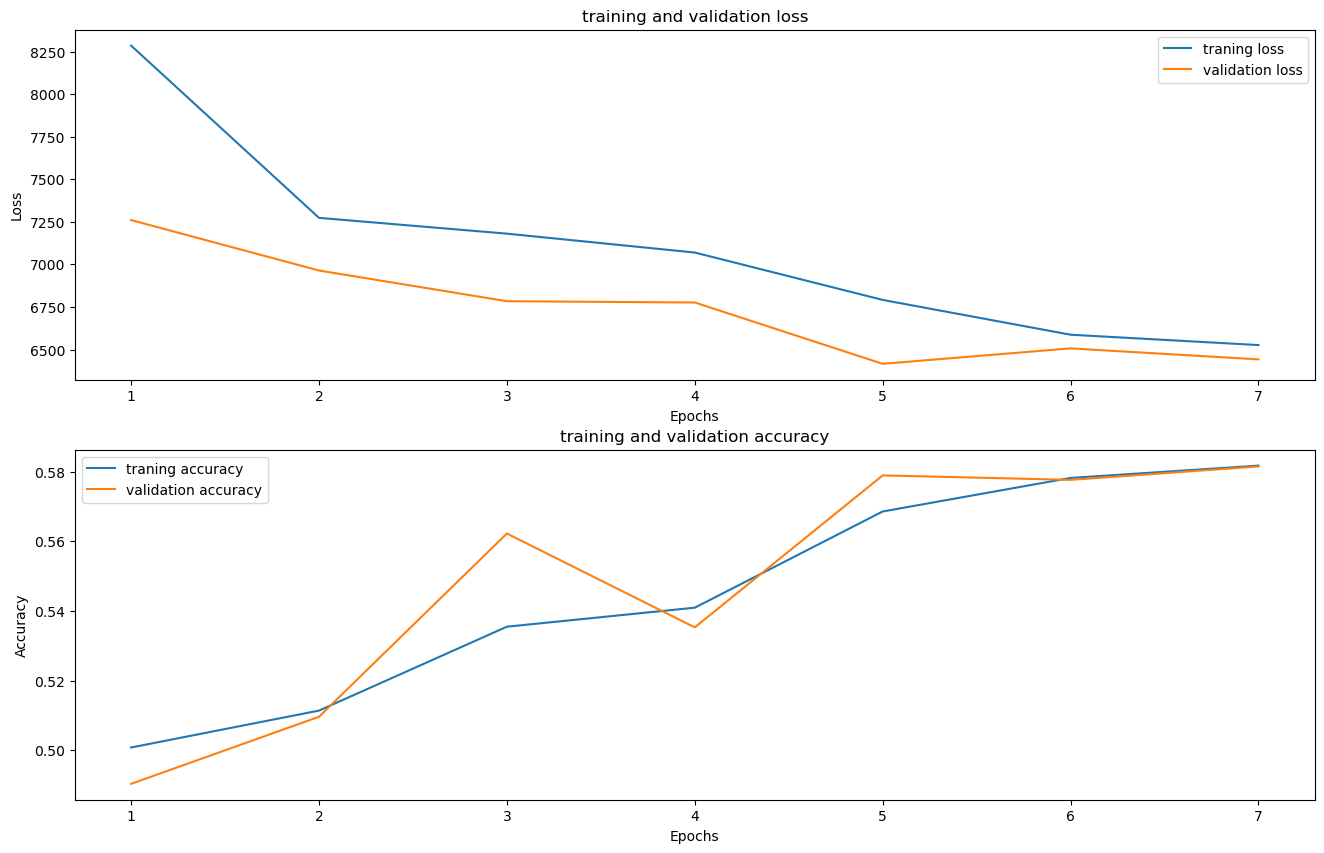

In [35]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss)+1)

# 畫損失函數圖
plt.figure(figsize=(16, 10))
plt.subplot(211)
plt.plot(epochs, loss, label='traning loss')
plt.plot(epochs, val_loss, label='validation loss')
plt.title('training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 畫準確率圖
plt.subplot(212)
plt.plot(epochs, acc, label='traning accuracy')
plt.plot(epochs, val_acc, label='validation accuracy')
plt.title('training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [36]:
model.evaluate(X_val, y_val, verbose=2)

25/25 - 1s - loss: 6442.1226 - accuracy: 0.5815 - 1s/epoch - 55ms/step


[6442.12255859375, 0.5815147757530212]

In [37]:
# 保存模型
model.save('my_model.h5')

In [21]:
# 设置保存路径
model_save_path = "/Users/LeoSu/Desktop/DATA608/Project/model"

# 保存模型为 SavedModel 格式
tf.saved_model.save(model, model_save_path)


INFO:tensorflow:Assets written to: /Users/LeoSu/Desktop/DATA608/Project/model/assets


INFO:tensorflow:Assets written to: /Users/LeoSu/Desktop/DATA608/Project/model/assets


In [ ]:
# 加载模型
loaded_model = tf.saved_model.load(model_save_path)

# 获取模型签名
signature = loaded_model.signatures["serving_default"]

# 准备输入数据
input_data = x_test[:1]

# 使用模型进行预测
prediction = signature(tf.constant(input_data))["dense_1"]
print("预测结果：", tf.argmax(prediction, axis=1).numpy())


In [25]:
import base64

def image_to_base64(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")

image_paths = ["/Users/LeoSu/Desktop/DATA608/Project/newly_processed/image_0.png", "/Users/LeoSu/Desktop/DATA608/Project/newly_processed/image_1.png", "/Users/LeoSu/Desktop/DATA608/Project/newly_processed/image_2.png"]  # 你的图像路径列表
encoded_images = [image_to_base64(image_path) for image_path in image_paths]


In [27]:
with open("input.jsonl", "w") as f:
    for encoded_image in encoded_images:
        json_obj = {"input_key": encoded_image}
        f.write(json.dumps(json_obj) + "\n")


In [16]:
imglist2[0]

array([[[ 90,  93, 103],
        [ 81,  82,  97],
        [110, 121, 138],
        ...,
        [229, 226, 220],
        [229, 226, 221],
        [228, 226, 223]],

       [[117, 121, 133],
        [ 88,  99, 117],
        [ 79,  90, 109],
        ...,
        [228, 228, 223],
        [227, 226, 223],
        [226, 225, 223]],

       [[168, 177, 185],
        [151, 161, 172],
        [141, 149, 162],
        ...,
        [226, 225, 226],
        [228, 225, 224],
        [228, 227, 228]],

       ...,

       [[133, 156, 176],
        [138, 159, 181],
        [139, 160, 182],
        ...,
        [149, 161, 171],
        [160, 173, 182],
        [177, 193, 197]],

       [[130, 154, 176],
        [132, 155, 179],
        [134, 157, 180],
        ...,
        [141, 162, 176],
        [143, 161, 175],
        [157, 170, 180]],

       [[128, 152, 174],
        [131, 153, 176],
        [133, 155, 178],
        ...,
        [147, 171, 186],
        [140, 163, 176],
        [142, 161, 176]]

In [17]:
newly_processed[0]

array([[[127, 133, 133],
        [126, 131, 131],
        [122, 128, 130],
        ...,
        [106, 113, 116],
        [108, 115, 118],
        [108, 114, 117]],

       [[131, 138, 136],
        [125, 129, 130],
        [124, 128, 132],
        ...,
        [ 99, 106, 110],
        [ 99, 105, 109],
        [106, 114, 117]],

       [[130, 135, 134],
        [126, 129, 131],
        [126, 131, 134],
        ...,
        [ 92,  99, 102],
        [ 94, 100, 104],
        [104, 112, 116]],

       ...,

       [[102, 107, 114],
        [126, 134, 140],
        [120, 128, 133],
        ...,
        [122, 125, 131],
        [119, 122, 129],
        [114, 118, 125]],

       [[106, 111, 119],
        [112, 117, 125],
        [102, 108, 115],
        ...,
        [118, 121, 129],
        [125, 130, 138],
        [100, 103, 108]],

       [[113, 118, 126],
        [103, 107, 117],
        [100, 106, 113],
        ...,
        [116, 120, 128],
        [101, 105, 112],
        [ 94,  98, 104]]

In [7]:
# a = list(filtered_labels.keys())
# filtered_labels2 ={}
# for k in a:
#   tmp = k + ".tif"
#   filtered_labels2[tmp] = filtered_labels[k]
# # filtered_labels2.items()

In [45]:
# import math 
# from math import ceil

In [57]:
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

# # Define the RCNN model
# def create_rcnn_model(input_shape, num_classes):
#     inputs = Input(shape=input_shape)
#     x = Conv2D(32, (3, 3), activation='relu')(inputs)
#     x = MaxPooling2D((2, 2))(x)
#     x = Conv2D(64, (3, 3), activation='relu')(x)
#     x = MaxPooling2D((2, 2))(x)
#     x = Flatten()(x)
#     x = Dense(64, activation='relu')(x)
#     outputs = Dense(num_classes + 4, activation='sigmoid')(x) # add 4 units for predicted bbox coordinates
#     model = keras.Model(inputs=inputs, outputs=outputs)
#     return model

# # Set the input size of the RCNN model
# input_width = 224
# input_height = 224
# input_shape = (input_height, input_width, 3)

# # Set the number of classes for the RCNN model
# num_classes = 1

# # Create the RCNN model
# model = create_rcnn_model(input_shape, num_classes)

# train_inputs = []
# train_outputs = []
# for img_filename, bbox_list in filtered_labels2.items():
#     # Load the image
#     dir_path = 'images'
#     dir_img = os.path.join(dir_path, img_filename)
#     img = cv2.imread(dir_img)
#     # Create the input for the RCNN model
#     for bbox in bbox_list:
#         # Crop the image patch based on the bounding box coordinates
#         x1, y1, x2, y2 = bbox
#         img_patch = img[int(y1):ceil(y2), int(x1):ceil(x2)]
        
#         # Resize the image patch to the desired input size of the RCNN model
#         img_patch = cv2.resize(img_patch, dsize = (input_width,input_height))
        
#         # Convert the image patch to a numpy array and add it to the inputs list
#         train_inputs.append(np.array(img_patch))
#         bbox_coords = [0]*(num_classes + 4)
#         bbox_coords[-4:] = [(x1 - ceil(x2)) / (input_width * 1.0), (y1 - ceil(y2)) / (input_height * 1.0), (ceil(x2) - x1) / (input_width * 1.0), (ceil(y2) - y1) / (input_height * 1.0)] # set the last 4 units of bbox_coords to the normalized bbox coordinates
#         train_outputs.append(np.array(bbox_coords))
  
#     # Convert the inputs list to a numpy array
# train_inputs = np.array(train_inputs)
# train_outputs = np.array(train_outputs)


# # Compile the model
# model.compile(optimizer=tf.keras.optimizers.legacy.Adam(1e-3), loss='binary_crossentropy', metrics=['accuracy'])

# # Train the model
# model.fit(train_inputs, train_outputs, epochs=10, batch_size=32)




Epoch 1/10


2023-03-30 13:33:45.916394: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


345/345 [==============================] - 12s 31ms/step - loss: -6545236480.0000 - accuracy: 0.5053
Epoch 2/10
345/345 [==============================] - 11s 31ms/step - loss: -320528941056.0000 - accuracy: 0.4940
Epoch 3/10
345/345 [==============================] - 11s 31ms/step - loss: -2408355201024.0000 - accuracy: 0.4873
Epoch 4/10
345/345 [==============================] - 11s 31ms/step - loss: -8751275835392.0000 - accuracy: 0.5058
Epoch 5/10
345/345 [==============================] - 11s 31ms/step - loss: -22229414838272.0000 - accuracy: 0.5003
Epoch 6/10
345/345 [==============================] - 11s 31ms/step - loss: -45717712273408.0000 - accuracy: 0.5025
Epoch 7/10
345/345 [==============================] - 11s 31ms/step - loss: -82030251474944.0000 - accuracy: 0.5002
Epoch 8/10
345/345 [==============================] - 11s 31ms/step - loss: -133818908409856.0000 - accuracy: 0.5028
Epoch 9/10
345/345 [==============================] - 11s 31ms/step - loss: -2039372106956

In [50]:
# model.save_weights('rcnn_weight.h5')
# model.load_weights('rcnn_weight.h5')

# img = cv2.imread("images/000000032998.tif")
# img = cv2.resize(img, dsize = (224,224))
# img = np.expand_dims(img, axis = 0)

# preds = model.predict(img)

# # Get the predicted bbox coordinates
# x1_pred = int(preds[0][-4] * input_width)
# y1_pred = int(preds[0][-3] * input_height)
# x2_pred = int(preds[0][-2] * input_width)
# y2_pred = int(preds[0][-1] * input_height)

# # Draw the predicted bbox on the external image
# bbox_color = (0, 255, 0) # green
# bbox_thickness = 2
# cv2.rectangle(img, (x1_pred, y1_pred), (x2_pred, y2_pred), bbox_color, bbox_thickness)

# # Show the external image with the predicted bbox
# cv2.imshow('External Image with Predicted Bounding Box', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()



1/1 [==============================] - 0s 10ms/step


error: OpenCV(4.7.0) /Users/xperience/GHA-OCV-Python/_work/opencv-python/opencv-python/opencv/modules/core/src/matrix_c.cpp:190: error: (-5:Bad argument) Unknown array type in function 'cvarrToMat'


In [33]:
# import cv2
# import numpy as np

# img = cv2.imread(i)

# # Resize the image to the input size of the RCNN model
# resized_img = cv2.resize(img, (224, 224))

# # Convert the resized image to a numpy array and add it to the inputs list
# inputs = np.array([resized_img])

# # Predict the output of the model
# outputs = model.predict(inputs)
# out[i] = np.sum(outputs)



1/1 [==============================] - 0s 7ms/step


1/1 [==============================] - 0s 8ms/step


1/1 [==============================] - 0s 8ms/step


1/1 [==============================] - 0s 8ms/step


1/1 [==============================] - 0s 8ms/step


1/1 [==============================] - 0s 8ms/step


1/1 [==============================] - 0s 8ms/step


1/1 [==============================] - 0s 8ms/step


1/1 [==============================] - 0s 7ms/step


1/1 [==============================] - 0s 7ms/step


1/1 [==============================] - 0s 8ms/step


1/1 [==============================] - 0s 7ms/step


1/1 [==============================] - 0s 7ms/step


1/1 [==============================] - 0s 7ms/step


1/1 [==============================] - 0s 8ms/step


1/1 [==============================] - 0s 8ms/step


1/1 [==============================] - 0s 8ms/step


1/1 [==============================] - 0s 8ms/step


1/1 [==============================] - 0s 8ms/step


1/1 [==============================] - 0s 8ms/step


In [ ]:
# # Loop through the predictions for each image patch
# for i, pred in enumerate(predictions):
#     # Get the predicted class and probability
#     pred_class = np.argmax(pred)
#     pred_prob = pred[pred_class]
    
#     # Print the predicted class and probability
#     print("Image patch {}: Class = {}, Probability = {:.2f}".format(i, pred_class, pred_prob))

Image patch 0: Class = 0, Probability = 1.00


In [ ]:
# labellist = []
# imglist = []
# for filename in glob.glob('labels/*.xml'): 
#     name = filename.split('/')[1]
#     labellist.append(labels[name])
#     img_name = name.split('.')[0]+'.tif'
#     imglist.append(imgdict[img_name])
# print(len(imglist))

# tmp1 = np.array(imglist)
# tmp2 = np.array(labellist)


labellist2 = []
imglist2 = []
for k,v in filtered_labels1.items():
    labellist2.append(filtered_labels1[k])
    imglist2.append(filtered_image[k])

0


In [13]:
labellist2

[[111.51, 51.19, 126.95, 63.15],
 [0.0, 2.44, 3.64, 9.49],
 [79.08, 0.0, 126.49, 145.8],
 [194.36, 112.97, 217.47, 145.65],
 [63.38, 0.0, 75.87, 7.52],
 [173.08, 17.85, 193.32, 38.45],
 [242.34, 234.69, 256.0, 256.0],
 [138.35, 0.0, 150.19, 4.47],
 [0.0, 224.56, 10.74, 256.0],
 [0.0, 36.33, 4.16, 45.71],
 [246.39, 82.55, 256.0, 103.8],
 [64.73, 90.49, 70.97, 101.76],
 [125.94, 116.88, 174.36, 155.09],
 [209.88, 108.99, 226.02, 129.42],
 [113.78, 155.23, 142.2, 173.46],
 [71.77, 60.22, 94.85, 78.64],
 [0.0, 0.0, 85.91, 49.1],
 [158.53, 51.66, 204.54, 78.07],
 [85.2, 198.3, 99.92, 213.0],
 [150.91, 23.45, 169.51, 53.88],
 [234.09, 44.53, 256.0, 84.61],
 [248.82, 175.84, 256.0, 193.02],
 [44.46, 109.36, 51.91, 116.52],
 [6.93, 145.11, 19.5, 165.03],
 [0.0, 193.28, 8.81, 256.0],
 [200.0, 253.31, 217.09, 256.0],
 [209.37, 70.41, 256.0, 159.6],
 [128.6, 72.28, 148.88, 93.24],
 [137.86, 209.04, 171.96, 236.24],
 [0.0, 242.21, 38.09, 256.0],
 [255.57, 114.77, 256.0, 117.79],
 [60.88, 165.29, 1

In [15]:
# labellist2,imglist2
import cv2
import numpy as np
from tqdm import trange

processed_image = []
processed_label= []
for i in trange(len(labellist2)):
    result = cv2.resize(imglist2[i], None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
    processed_image.append(result)
#     processed_image.append(denoise_brightness(cv2.cvtColor(result, cv2.COLOR_BGR2GRAY),result))
    a = []
    for j in range(len(labellist2[i])): 
        a.append(labellist2[i][j]*(512/256))
    processed_label.append(a)

100%|█████████████████████████████████████| 2000/2000 [00:00<00:00, 4181.05it/s]


In [3]:

X_train, X_val, y_train, y_val = train_test_split(np.array(processed_image), np.array(processed_label), test_size=0.2, random_state=42)

# # Normalize the data
# X_train = X_train / 255.0
# X_val = X_val / 255.0

# Normalize the data
X_train = X_train/511.0
X_val = X_val/511.0

# Define the CNN model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(512, 512, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(4, activation='linear') # Linear activation for regression
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(1e-3), loss='mse', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Make predictions on the validation set
y_pred = model.predict(X_val)

NameError: name 'processed_image' is not defined

In [4]:

X_train, X_val, y_train, y_val = train_test_split(np.array(imglist2), np.array(labellist2), test_size=0.2, random_state=42)

# Normalize the data
X_train = X_train / 255.0
X_val = X_val / 255.0

# # Normalize the data
# X_train = X_train/511.0
# X_val = X_val/511.0

# Define the CNN model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(4, activation='linear') # Linear activation for regression
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(1e-3), loss='mse', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=22, validation_data=(X_val, y_val))

# Make predictions on the validation set
y_pred = model.predict(X_val)

NameError: name 'imglist2' is not defined

In [40]:
from tensorflow.keras.callbacks import EarlyStopping
X_train, X_val, y_train, y_val = train_test_split(np.array(newly_processed), np.array(labellist2), test_size=0.2, random_state=42)

# Normalize the data
X_train = X_train / 255.0
X_val = X_val / 255.0

# # Normalize the data
# X_train = X_train/511.0
# X_val = X_val/511.0

# Define the CNN model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(4, activation='linear') # Linear activation for regression
])

# Early stopping
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 3, verbose =1)
# Compile the model
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(1e-3), loss='mse', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))#, callbacks = [early_stopping])

# Make predictions on the validation set
y_pred = model.predict(X_val)

Epoch 1/10


2023-03-31 19:44:25.985649: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


98/98 [==============================] - ETA: 0s - loss: 8160.5620 - accuracy: 0.4767

2023-03-31 19:44:38.520629: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


98/98 [==============================] - 14s 141ms/step - loss: 8160.5620 - accuracy: 0.4767 - val_loss: 7111.6753 - val_accuracy: 0.4840
Epoch 2/10
98/98 [==============================] - 12s 123ms/step - loss: 7276.5142 - accuracy: 0.4982 - val_loss: 7007.2710 - val_accuracy: 0.5096
Epoch 3/10
98/98 [==============================] - 12s 119ms/step - loss: 7147.2188 - accuracy: 0.5059 - val_loss: 7785.9268 - val_accuracy: 0.5096
Epoch 4/10
98/98 [==============================] - 12s 120ms/step - loss: 7086.9888 - accuracy: 0.5406 - val_loss: 7067.9434 - val_accuracy: 0.5417
Epoch 5/10
98/98 [==============================] - 12s 119ms/step - loss: 6960.9116 - accuracy: 0.5500 - val_loss: 6948.7495 - val_accuracy: 0.5327
Epoch 6/10
98/98 [==============================] - 12s 124ms/step - loss: 6731.2368 - accuracy: 0.5708 - val_loss: 6530.2856 - val_accuracy: 0.5469
Epoch 7/10
98/98 [==============================] - 13s 130ms/step - loss: 6701.9648 - accuracy: 0.5650 - val_loss: 6

2023-03-31 19:46:29.556702: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 1s 53ms/step


In [66]:
def calculate_iou(gt_bbox, pred_bbox):
    x1_t, y1_t, x2_t, y2_t = gt_bbox
    x1_p, y1_p, x2_p, y2_p = pred_bbox

    x1_intersection = max(x1_t, x1_p)
    y1_intersection = max(y1_t, y1_p)
    x2_intersection = min(x2_t, x2_p)
    y2_intersection = min(y2_t, y2_p)

    intersection_area = max(0, x2_intersection - x1_intersection) * max(0, y2_intersection - y1_intersection)

    gt_bbox_area = (x2_t - x1_t) * (y2_t - y1_t)
    pred_bbox_area = (x2_p - x1_p) * (y2_p - y1_p)

    union_area = gt_bbox_area + pred_bbox_area - intersection_area

    iou = intersection_area / union_area
    return iou

# Calculate the IoUs for the validation set
ious = [calculate_iou(y_val[i], y_pred[i]) for i in range(len(y_val))]

# Calculate the average IoU
average_iou = np.mean(ious)
print("Average IoU:", average_iou)

Average IoU: 0.005043807415225612


In [8]:

def display_image_with_box(image, bbox, pred):
    image_with_box = image.copy()
    # for i in bbox:
    #     cv2.rectangle(image_with_box, (int(i[0]), int(i[1])), (int(i[2]), int(i[3])), (0, 255, 0), thickness=2)
    cv2.rectangle(image_with_box, (int(bbox[0]), int(bbox[1])), (int(bbox[2]), int(bbox[3])), (0, 255, 0), thickness=2)
    cv2.rectangle(image_with_box, (int(pred[0]), int(pred[1])), (int(pred[2]), int(pred[3])), (0, 0, 255), thickness=2)    
    cv2.imshow(image_with_box)


for i in range(20):
    tmp_name = str(i) + ".jpg"
    display_image_with_box(X_val[i]*255, y_val[i], y_pred[i])

error: OpenCV(4.7.0) :-1: error: (-5:Bad argument) in function 'imshow'
> Overload resolution failed:
>  - imshow() missing required argument 'mat' (pos 2)
>  - imshow() missing required argument 'mat' (pos 2)
>  - imshow() missing required argument 'mat' (pos 2)


In [ ]:
def display_image_with_box(image, bbox, pred):
    image_with_box = image.copy()
    # for i in bbox:
    #     cv2.rectangle(image_with_box, (int(i[0]), int(i[1])), (int(i[2]), int(i[3])), (0, 255, 0), thickness=2)
    cv2.rectangle(image_with_box, (int(bbox[0]), int(bbox[1])), (int(bbox[2]), int(bbox[3])), (0, 255, 0), thickness=2)
    cv2.rectangle(image_with_box, (int(pred[0]), int(pred[1])), (int(pred[2]), int(pred[3])), (0, 0, 255), thickness=2)
    cv2_imshow( image_with_box)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
for i in range(12):
    display_image_with_box(X_val[i]*255, y_val[i], y_pred[i])

# New Section

In [11]:
def save_image_with_box(filename, image, bbox, pred):
    image_with_box = image.copy()
    cv2.rectangle(image_with_box, (int(bbox[0]), int(bbox[1])), (int(bbox[2]), int(bbox[3])), (0, 255, 0), thickness=2)
    cv2.rectangle(image_with_box, (int(pred[0]), int(pred[1])), (int(pred[2]), int(pred[3])), (0, 0, 255), thickness=2)

    # 保存图像到文件
    cv2.imwrite(filename, image_with_box)

# 示例用法

index = 12  # 更改此索引以选择要保存的图像
for i in range(len(X_val)):
  filename = str(i) + ".jpg"
  save_image_with_box(filename, X_val[i]*255, y_val[i], y_pred[i])


In [ ]:
y_val[1][0]

In [10]:
!pip install tqdm

In [11]:
from tqdm import tqdm, trange

In [25]:
def denoise_brightness(img, original):
    equ = cv2.equalizeHist(img)
    res = np.hstack((img,equ)) #stacking images side-by-side
    # cv2.imwrite('res.png',res)
# cv2.imshow('img', img)
#     cv2.imshow('res',res)

    #h2 is after applying thresholding
    # h2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

    #contrast stretched
    # contr = contrast_stretch(res)
    # cv2.imshow('original', original)
    # cv2.imshow('Mean threshold', h2)

    # cv2.imshow('contrast', contr)

    increased = inc(original)
    increased2 = inc2(increased)
    gamma = adjust_gamma(original,1.25)
    new_increased2 = adjust_gamma(increased, 1.25)
    new_increased3 = adjust_gamma(increased2, 1.25)
    # x = concatenate(increased, new_increased1)
    gti = inc2(gamma, 1.25)
    x= np.zeros(img.shape, img.dtype)
    x1 = np.zeros(img.shape, img.dtype)
    x = cv2.addWeighted(gti, 0.4, gamma, 0.6, 0.0, x);
    x1 = cv2.addWeighted(gti, 0.3, gamma, 0.7, 0.0, x1);
    # stretched = contrast_stretch(increased)
    # cv2.imshow('Increased contrast', increased)
    # cv2.imshow('Increased contrast 2', increased2)
    # cv2.imshow('Gamma', gamma)
    # cv2.imwrite('After Gamma.jpg', gamma)
    # cv2.imshow('gama_then_increased', gti)
    # cv2.imshow('New increased2', new_increased2)
    # cv2.imshow('New increased3', new_increased3)
    x2 =Brightness(x1, 2, 15)
    # cv2.imshow('concatenated', x)
    # cv2.imwrite('after concatenation.jpg', x1)
    # cv2.imshow('concatenated2', x1)
    # cv2.imshow('Brighnessed', x2)
    denoised = cv2.fastNlMeansDenoisingColored(x1, None, 8, 10, 7, 21)
    # cv2.imshow('stretched', denoised)
    denoised2 = cv2.fastNlMeansDenoisingColored(x1, None, 6, 10, 7, 21)
    # cv2.imshow('half noised', denoised2)
    # original = (255-original)
    # cv2.imshow('inverted', original)
    # HSV_applied = HSV_eq(original)
    # cv2.imshow('HSV_applied', HSV_applied)
    x2 = np.zeros(img.shape, img.dtype)
    x2 = cv2.addWeighted(denoised, 0.4, x1, 0.6, 0.0, x);
    # cv2.imshow('final_product', x2)
    # cv2.imwrite('final_product.jpg', x2)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()
    return x2


# def contrast_stretch(img):
#     xp = [0, 64, 128, 192, 255]
#     fp = [0, 16, 128, 240, 255]
#     x = np.arange(256)
#     table = np.interp(x, xp, fp).astype('uint8')
#     img = cv2.LUT(img, table)
#     return img

def inc(img):
    clahe = cv2.createCLAHE(clipLimit=3., tileGridSize=(8, 8))
    # fora = cv2.createCLAHE(clipLimit=2., tileGridSize=(12,12))

    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)  # convert from BGR to LAB color space
    l, a, b = cv2.split(lab)  # split on 3 different channels

    l2 = clahe.apply(l)  # apply CLAHE to the L-channel
    # l2 = l*2
    # b = fora.apply(b)
    lab = cv2.merge((l2, a, b))  # merge channels
    img2 = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)  # convert from LAB to BGR
    return img2

def inc2(img,x =1.5):
    clahe = cv2.createCLAHE(clipLimit=x, tileGridSize=(8, 8))
    # fora = cv2.createCLAHE(clipLimit=2., tileGridSize=(12,12))

    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)  # convert from BGR to LAB color space
    l, a, b = cv2.split(lab)  # split on 3 different channels

    l2 = clahe.apply(l)  # apply CLAHE to the L-channel
    # l2 = l*2
    # b = fora.apply(b)
    lab = cv2.merge((l2, a, b))  # merge channels
    img2 = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)  # convert from LAB to BGR
    return img2

def Brightness(image, alpha, beta):
    new_image = np.zeros(image.shape, image.dtype)
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            for c in range(image.shape[2]):
                new_image[y, x, c] = np.clip(alpha * image[y, x, c] + beta, 0, 255)
    return new_image

def adjust_gamma(image, gamma=1.0):
    # build a lookup table mapping the pixel values [0, 255] to
    # their adjusted gamma values
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
                      for i in np.arange(0, 256)]).astype("uint8")
    # apply gamma correction using the lookup table
    return cv2.LUT(image, table)

def HSV_eq(img):
    img_transf = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    img_transf[:, :, 2] = cv2.equalizeHist(img_transf[:, :, 2])
    img4 = cv2.cvtColor(img_transf, cv2.COLOR_HSV2BGR)
    return img4

In [14]:
len(image_list)

6163

In [26]:
# labellist2,imglist2
import cv2
import numpy as np
from tqdm import trange

processed_image2 = []
# processed_label= []
for i in trange(len(imglist2)):
#     result = cv2.resize(imglist2[i], None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
#     processed_image.append(result)
    processed_image.append(denoise_brightness(cv2.cvtColor(imglist2[i], cv2.COLOR_BGR2GRAY),imglist2[i]))
#     a = []
#     for j in range(len(labellist2[i])): 
#         a.append(labellist2[i][j]*(512/256))
#     processed_label.append(a)

100%|█████████████████████████████████████| 3892/3892 [1:36:25<00:00,  1.49s/it]


In [27]:
processed_image2= processed_image.copy()

In [32]:
newly_processed = processed_image2[2000:]

In [33]:
len(newly_processed)

3892

In [29]:
len(processed_image)

5892

In [34]:
len(image_list)

6163

In [43]:
len(labellist)

3892

In [39]:
output_directory = "newly_processed"  # The path to the directory where the processed images will be saved
os.makedirs(output_directory, exist_ok=True)  # Create the output directory if it doesn't exist

for idx, processed_image in enumerate(newly_processed):
    output_filename = f"image_{idx}.png"  # The output filename for the processed image
    output_filepath = os.path.join(output_directory, output_filename)
    cv2.imwrite(output_filepath, processed_image)

In [12]:
img_list = []
imgdict = {}
resized_images = []
from tqdm.notebook import tqdm
import cv2
import glob 

for filename in glob.glob('processed_images/*.png'):
    # print(filename)
    # img = Image.open(filename)
    img = cv2.imread(filename)
    # print(img.shape)
    # img = cv2.resize(img, (400,400))
    img_list.append(img)
    name = (filename.split('/')[1]).split('.')[0]
    imgdict[name] = img

# labels = {}
# labellist= []
# for filename in glob.glob('labels/*.xml'):
#     tree = ET.parse(filename) 
#     root = tree.getroot()
#     boxes = []
#     for obj in root.findall('object'):
#         name = obj.find('name').text
#     if name == '1' or name == '2':
#         bbox = [float(obj.find('bndbox/xmin').text), 
#                 float(obj.find('bndbox/ymin').text),
#                 float(obj.find('bndbox/xmax').text), 
#                 float(obj.find('bndbox/ymax').text)]
#         boxes.append(bbox)
#     tag_name = (filename.split('/')[1]).split('.')[0]
#     labels[tag_name] = boxes
#     labellist.append(boxes)

# print(labels["000000033107.xml"])

# for image in image_list:
#     image = DoG(image)
#     resized_images.append(image)


def display_image_with_box(image, bbox):
    image_with_box = image.copy()
    # for i in bbox:
    #     cv2.rectangle(image_with_box, (int(i[0]), int(i[1])), (int(i[2]), int(i[3])), (0, 255, 0), thickness=2)
    cv2.rectangle(image_with_box, (int(bbox[0]), int(bbox[1])), (int(bbox[2]), int(bbox[3])), (0, 255, 0), thickness=2)
    cv2.imshow("Image", image_with_box)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    


In [14]:
len(img_list)

5500

In [15]:
def is_mostly_white_or_black(image, white_threshold=250, black_threshold=5, percentage_threshold=90):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    total_pixels = gray_image.size
    white_pixels = cv2.countNonZero(gray_image > white_threshold)
    black_pixels = cv2.countNonZero(gray_image < black_threshold)

    white_percentage = (white_pixels / total_pixels) * 100
    black_percentage = (black_pixels / total_pixels) * 100

    return white_percentage >= percentage_threshold or black_percentage >= percentage_threshold

In [20]:
length_img = len(img_list)
# filtered_labels1 = filtered_labels1[::5500]

In [52]:
labellist

[[111.51, 51.19, 126.95, 63.15],
 [0.0, 2.44, 3.64, 9.49],
 [79.08, 0.0, 126.49, 145.8],
 [194.36, 112.97, 217.47, 145.65],
 [63.38, 0.0, 75.87, 7.52],
 [173.08, 17.85, 193.32, 38.45],
 [242.34, 234.69, 256.0, 256.0],
 [138.35, 0.0, 150.19, 4.47],
 [0.0, 224.56, 10.74, 256.0],
 [0.0, 36.33, 4.16, 45.71],
 [246.39, 82.55, 256.0, 103.8],
 [64.73, 90.49, 70.97, 101.76],
 [125.94, 116.88, 174.36, 155.09],
 [209.88, 108.99, 226.02, 129.42],
 [113.78, 155.23, 142.2, 173.46],
 [71.77, 60.22, 94.85, 78.64],
 [0.0, 0.0, 85.91, 49.1],
 [158.53, 51.66, 204.54, 78.07],
 [85.2, 198.3, 99.92, 213.0],
 [150.91, 23.45, 169.51, 53.88],
 [234.09, 44.53, 256.0, 84.61],
 [248.82, 175.84, 256.0, 193.02],
 [44.46, 109.36, 51.91, 116.52],
 [6.93, 145.11, 19.5, 165.03],
 [0.0, 193.28, 8.81, 256.0],
 [200.0, 253.31, 217.09, 256.0],
 [209.37, 70.41, 256.0, 159.6],
 [128.6, 72.28, 148.88, 93.24],
 [137.86, 209.04, 171.96, 236.24],
 [0.0, 242.21, 38.09, 256.0],
 [255.57, 114.77, 256.0, 117.79],
 [60.88, 165.29, 1

In [61]:
ll2

[[[111.51, 51.19, 126.95, 63.15]],
 [[0.0, 2.44, 3.64, 9.49]],
 [],
 [[79.08, 0.0, 126.49, 145.8]],
 [[194.36, 112.97, 217.47, 145.65]],
 [[63.38, 0.0, 75.87, 7.52]],
 [[173.08, 17.85, 193.32, 38.45]],
 [],
 [[242.34, 234.69, 256.0, 256.0]],
 [],
 [],
 [],
 [[138.35, 0.0, 150.19, 4.47]],
 [[0.0, 224.56, 10.74, 256.0]],
 [[0.0, 36.33, 4.16, 45.71]],
 [[246.39, 82.55, 256.0, 103.8]],
 [[64.73, 90.49, 70.97, 101.76]],
 [[125.94, 116.88, 174.36, 155.09]],
 [],
 [],
 [[209.88, 108.99, 226.02, 129.42]],
 [[113.78, 155.23, 142.2, 173.46]],
 [[71.77, 60.22, 94.85, 78.64]],
 [[0.0, 0.0, 85.91, 49.1]],
 [],
 [[158.53, 51.66, 204.54, 78.07]],
 [[85.2, 198.3, 99.92, 213.0]],
 [[150.91, 23.45, 169.51, 53.88]],
 [[234.09, 44.53, 256.0, 84.61]],
 [],
 [[248.82, 175.84, 256.0, 193.02]],
 [[44.46, 109.36, 51.91, 116.52]],
 [[6.93, 145.11, 19.5, 165.03]],
 [[0.0, 193.28, 8.81, 256.0]],
 [],
 [],
 [[200.0, 253.31, 217.09, 256.0]],
 [[209.37, 70.41, 256.0, 159.6]],
 [],
 [[128.6, 72.28, 148.88, 93.24]],
 

In [63]:
ll2

[[[111.51, 51.19, 126.95, 63.15]],
 [[0.0, 2.44, 3.64, 9.49]],
 [],
 [[79.08, 0.0, 126.49, 145.8]],
 [[194.36, 112.97, 217.47, 145.65]],
 [[63.38, 0.0, 75.87, 7.52]],
 [[173.08, 17.85, 193.32, 38.45]],
 [],
 [[242.34, 234.69, 256.0, 256.0]],
 [],
 [],
 [],
 [[138.35, 0.0, 150.19, 4.47]],
 [[0.0, 224.56, 10.74, 256.0]],
 [[0.0, 36.33, 4.16, 45.71]],
 [[246.39, 82.55, 256.0, 103.8]],
 [[64.73, 90.49, 70.97, 101.76]],
 [[125.94, 116.88, 174.36, 155.09]],
 [],
 [],
 [[209.88, 108.99, 226.02, 129.42]],
 [[113.78, 155.23, 142.2, 173.46]],
 [[71.77, 60.22, 94.85, 78.64]],
 [[0.0, 0.0, 85.91, 49.1]],
 [],
 [[158.53, 51.66, 204.54, 78.07]],
 [[85.2, 198.3, 99.92, 213.0]],
 [[150.91, 23.45, 169.51, 53.88]],
 [[234.09, 44.53, 256.0, 84.61]],
 [],
 [[248.82, 175.84, 256.0, 193.02]],
 [[44.46, 109.36, 51.91, 116.52]],
 [[6.93, 145.11, 19.5, 165.03]],
 [[0.0, 193.28, 8.81, 256.0]],
 [],
 [],
 [[200.0, 253.31, 217.09, 256.0]],
 [[209.37, 70.41, 256.0, 159.6]],
 [],
 [[128.6, 72.28, 148.88, 93.24]],
 

In [ ]:
for i in range(len(filtered_labels1)):
    labellist[i]= filtered_labels1[i]* 512/256; 



In [ ]:
filtered_img = []
filtered_lls = []
for i in range(len(imglist)):
    if not is_mostly_white_or_black(imglist[i]):
        filtered_img.append(imglist[i])
        filtered_labels.append(labellist[i])

print(len(filtered_labels), len(filtered_img))

In [23]:
# def display_image_with_box(image, bbox):
#     image_with_box = image.copy()
#     for i in bbox:
#         cv2.rectangle(image_with_box, (int(i[0]), int(i[1])), (int(i[2]), int(i[3])), (0, 255, 0), thickness=2)
# #     cv2.rectangle(image_with_box, (int(bbox[0]), int(bbox[1])), (int(bbox[2]), int(bbox[3])), (0, 255, 0), thickness=2)
#     cv2.imshow("Image", image_with_box)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()
    
# dir_name = "images/000000025097.tif"
# tmp = cv2.imread(dir_name)
# bbox1 = (dir_name.split('/')[1]).split('.')[0]
# display_image_with_box(tmp, labels[bbox1])



In [3]:
import datetime
import os

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_cloud as tfc
#import tensorflow_datasets as tfds

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model